In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from yellowbrick.datasets import load_mushroom
import seaborn as sn
import numpy as np

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
dataset = load_mushroom(return_dataset=True)
df = dataset.to_dataframe()
df.head()
X = df.drop(columns=['target'])
y = df['target']
print('\nDataset Mushroom\n')



Dataset Mushroom



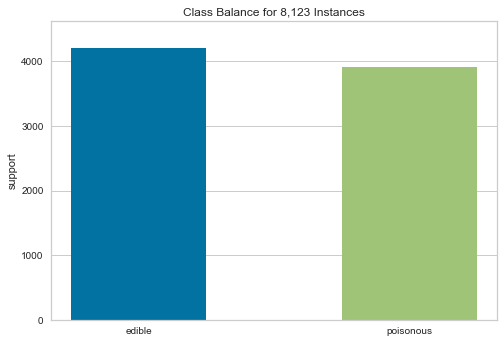

Preprocessing

X_train :  (6498, 20) 
X_test :  (1625, 20) 
y_train :  (6498,) 
y_test :  (1625,)


In [3]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder(handle_unknown='ignore')
y_scale = le.fit_transform(y)
X_scale = ohe.fit_transform(X)

from yellowbrick.target import class_balance

class_balance(y_scale, labels=['edible','poisonous'])


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, 
                                                    test_size=0.2, 
                                                    random_state=0)
print('Preprocessing\n')
print('X_train : ', X_train.shape, '\nX_test : ', X_test.shape, '\ny_train : ', 
      y_train.shape, '\ny_test : ', y_test.shape)

In [4]:
# Learning Algorithms
print('\nLearning Algorithms\n')
from sklearn.svm import SVC
'''
model = SVC(kernel='linear').fit(X_train, y_train)
y_pred = model.predict(X_test)
print('\nTraining Accuracy : ', model.score(X_train, y_train))
print('Test Accuracy : ', model.score(X_test, y_test))
'''


# Hyperparameters Optimization
'''
from sklearn.model_selection import GridSearchCV
print('\nHyperparameters Optimization...\n')
gsc = GridSearchCV(SVC(), {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear','poly','rbf','sigmoid'],
    'gamma': ['scale','auto']
    }, cv=5, return_train_score=True)

gsc.fit(X_train,y_train)
result = pd.DataFrame(gsc.cv_results_)
'''

model = SVC(kernel='rbf', C=100, gamma='auto').fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Training Accuracy : ', model.score(X_train, y_train))
print('Test Accuracy : ', model.score(X_test, y_test))


Learning Algorithms

Training Accuracy :  0.7152970144659896
Test Accuracy :  0.7113846153846154



Cross Validation

Cross Validation Score :  0.7262063497173114


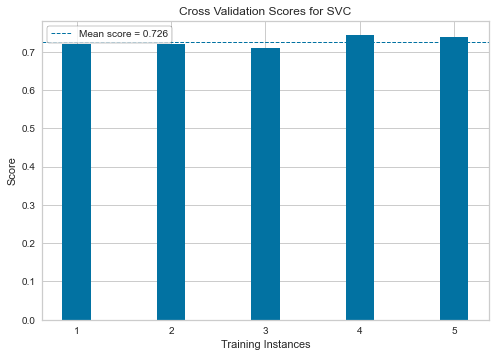


Visualization...


In [5]:
# Cross Validation Model
from sklearn.model_selection import (cross_val_score, StratifiedShuffleSplit)
from yellowbrick.model_selection import CVScores

cv = StratifiedShuffleSplit(n_splits=5, random_state=0)
cvs = cross_val_score(SVC(kernel='rbf', C=100, gamma='auto'), X_scale, 
                      y_scale, cv=cv, scoring='f1_macro')
print('\nCross Validation\n')
print('Cross Validation Score : ', cvs.mean())

cv_vis = CVScores(SVC(kernel='rbf', C=100, gamma='auto'), cv=cv, scoring='f1_macro')
cv_vis.fit(X_scale, y_scale)
cv_vis.show()
print('\nVisualization...')


Scoring Estimator

Classification Report : 
               precision    recall  f1-score   support

      edible       0.70      0.77      0.73       838
   poisonous       0.73      0.64      0.68       787

    accuracy                           0.71      1625
   macro avg       0.71      0.71      0.71      1625
weighted avg       0.71      0.71      0.71      1625


Visualization Matrix Confusion...


D:\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


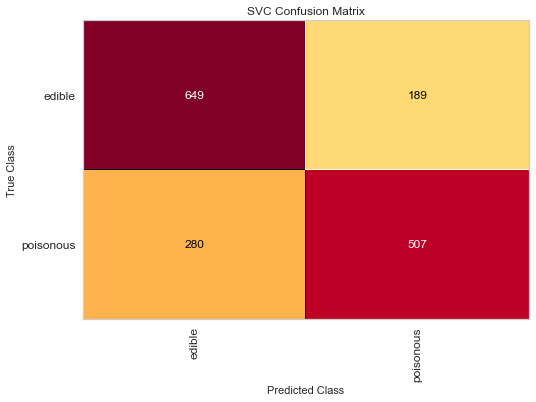


Visualization ROC/AUC...


D:\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


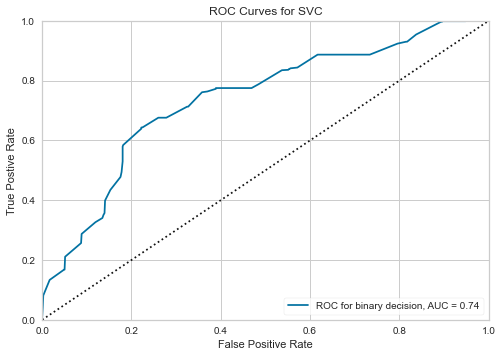


Visualization Precision-Recall Curves...


D:\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


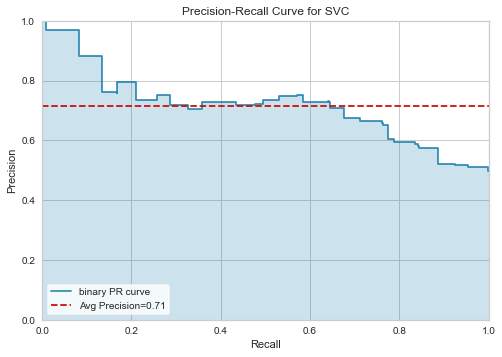


Visualization Class Prediction Error...


D:\Anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


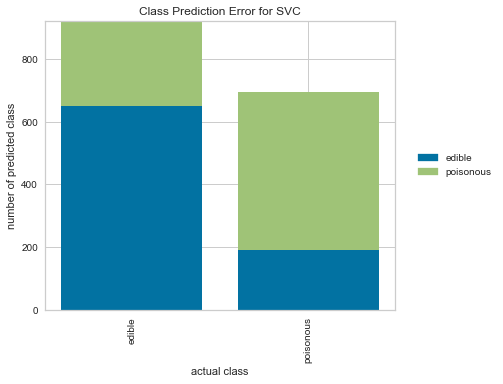

<Figure size 576x396 with 0 Axes>

<AxesSubplot:title={'center':'Class Prediction Error for SVC'}, xlabel='actual class', ylabel='number of predicted class'>

In [7]:
# Scoring Estimator
print('\nScoring Estimator\n')
## Classification Report
from sklearn.metrics import (classification_report, confusion_matrix)

name = ['edible', 'poisonous']
cr = classification_report(y_test, y_pred, target_names=name)
print('Classification Report : \n', cr)


## Confusion Matrix
from yellowbrick.classifier import confusion_matrix
print('\nVisualization Matrix Confusion...')
#matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(model, X_train, y_train , X_test, y_test, 
                      classes=['edible','poisonous'])
#print('\nMatrix Confusion : \n', matrix)


## ROC/AUC
from yellowbrick.classifier import ROCAUC
print('\nVisualization ROC/AUC...')
roc = ROCAUC(model,micro=False, macro=False, per_class=False , 
             classes=['edible','poisonous'])
roc.fit(X_train, y_train)
roc.score(X_test, y_test,)
roc.show()


## Precision-Recall Curves
from yellowbrick.classifier import precision_recall_curve
print('\nVisualization Precision-Recall Curves...')
pr = precision_recall_curve(model, X_train, y_train, X_test, y_test)


## Class Prediction Error
from yellowbrick.classifier import class_prediction_error
print('\nVisualization Class Prediction Error...')
vis = class_prediction_error(model, X_train, y_train, X_test, y_test, 
                             classes=['edible','poisonous'])
vis.show()